<a href="https://colab.research.google.com/github/AyeshaIjazTabassum/PythonAIBootcamp/blob/main/Day20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

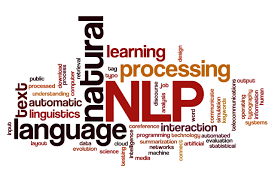

# What is NLP?
Natural Language Processing (NLP) is a branch of AI that helps computers understand, interpret, and manipulate human language.

In [1]:

import nltk

In [2]:
# Download NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('maxent_ne_chunker_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.


True

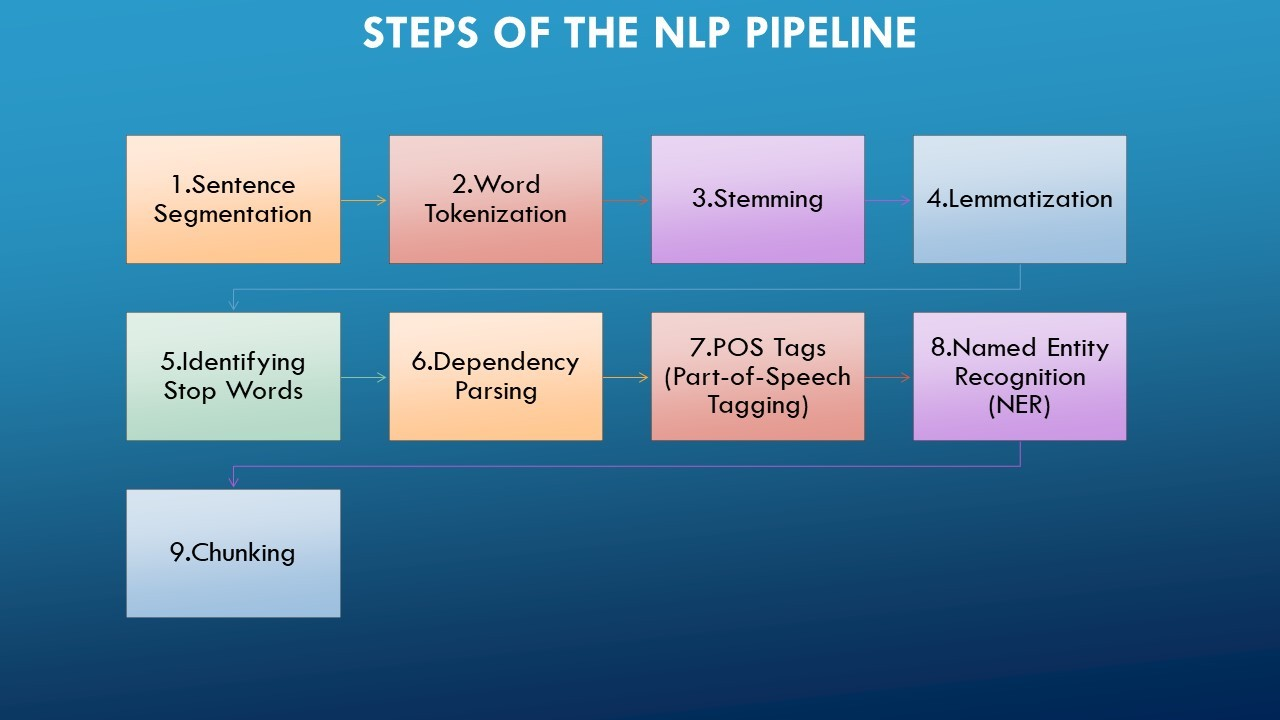

# 1. Lowercasing
Definition: Converting all text letters to lowercase (A → a, B → b, etc.)

Why we do it: Treats "Hello", "hello", and "HELLO" as the same word

In [3]:
text = "Hello World! NLP is AMAZING."
lowercase_text = text.lower()
print(lowercase_text)

hello world! nlp is amazing.


# 2. Tokenization
Definition: Splitting text into individual words or tokens

Why we do it: Computers need words separated to understand them

In [4]:
from nltk.tokenize import word_tokenize

text = "I love learning NLP!"
tokens = word_tokenize(text)
print(tokens)  # Output: ['I', 'love', 'learning', 'NLP', '!']

['I', 'love', 'learning', 'NLP', '!']


# 3. Stopword Removal
Definition: Removing common words like "the", "is", "and", "in"

Why we do it: These words don't help in understanding meaning

In [5]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
text = "This is a sample sentence for NLP"
words = text.split()

filtered_words = [word for word in words if word.lower() not in stop_words]
print(filtered_words)  # Output: ['sample', 'sentence', 'NLP']

['sample', 'sentence', 'NLP']


# 4. Stemming
Definition: Cutting off word endings to get the root form

Why we do it: "running", "runs", "ran" → all become "run"

In [6]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
words = ["running", "runs", "ran", "happily", "happiness"]

for word in words:
    stem = stemmer.stem(word)
    print(f"{word} → {stem}")
# Output:
# running → run
# runs → run
# ran → ran
# happily → happili
# happiness → happi

running → run
runs → run
ran → ran
happily → happili
happiness → happi


# 5. Lemmatization
Definition: Getting the dictionary form of a word (more accurate than stemming)

Why we do it: "better" → "good", "went" → "go"

In [7]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
words = ["running", "better", "went", "mice"]

for word in words:
    lemma = lemmatizer.lemmatize(word)
    print(f"{word} → {lemma}")
# Output:
# running → running
# better → better
# went → went
# mice → mouse

# For verbs:
print(lemmatizer.lemmatize("running", pos='v'))  # Output: run
print(lemmatizer.lemmatize("better", pos='a'))   # Output: good

running → running
better → better
went → went
mice → mouse
run
good


# 6. Removing Special Characters
Definition: Removing symbols like @, #, $, numbers, etc.

Why we do it: Clean text for analysis

In [8]:
import re

text = "Hello! NLP is great. Visit https://example.com #NLP"
clean_text = re.sub(r'[^a-zA-Z\s]', '', text)
print(clean_text)  # Output: "Hello NLP is great Visit https example com NLP"

Hello NLP is great Visit httpsexamplecom NLP


# What is Feature Engineering?
Definition: Converting text into numbers that computers can understand.

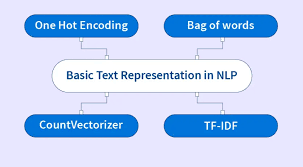

# 7: One-Hot Encoding

**Definition**: One-Hot Encoding is a process of converting categorical data (like words or labels) into a numerical format that machine learning algorithms can understand. For each unique category, a new binary column (a 'hot' vector) is created. If an item belongs to that category, the column has a '1' (hot), otherwise '0' (cold).

**Why we do it**: Machine learning models typically require numerical input. One-Hot Encoding allows us to represent categorical variables without implying any ordinal relationship (e.g., 'cat' is not 'greater than' 'dog'), which could be misleading if we just assigned arbitrary numbers like 0, 1, 2.

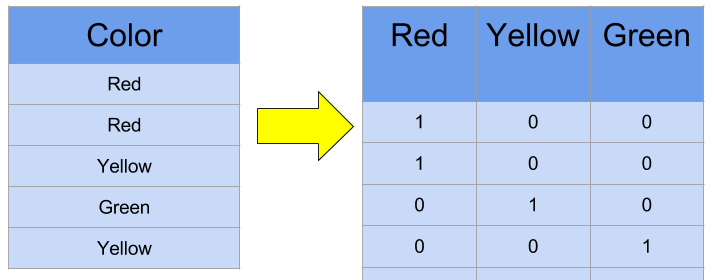

In [9]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

categories = np.array(['cat', 'dog', 'mouse', 'cat', 'dog']).reshape(-1, 1)

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

one_hot_encoded_data = encoder.fit_transform(categories)


In [10]:
print("Original Categories:")
print(categories.flatten())


Original Categories:
['cat' 'dog' 'mouse' 'cat' 'dog']


In [11]:
print("\nUnique Categories (Features):")
print(encoder.get_feature_names_out())



Unique Categories (Features):
['x0_cat' 'x0_dog' 'x0_mouse']


In [12]:
print("\nOne-Hot Encoded Data:")
print(one_hot_encoded_data)


One-Hot Encoded Data:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]


In this example:
- We have 3 unique categories: 'cat', 'dog', 'mouse'.
- The OneHotEncoder creates 3 new columns.
- Each row in the `one_hot_encoded_data` array represents an original category, with a '1' in the column corresponding to its category and '0's elsewhere.

# 8. Bag of Words (BoW)
Definition: Counting how many times each word appears in text

Why we do it: Convert text to numbers for computers

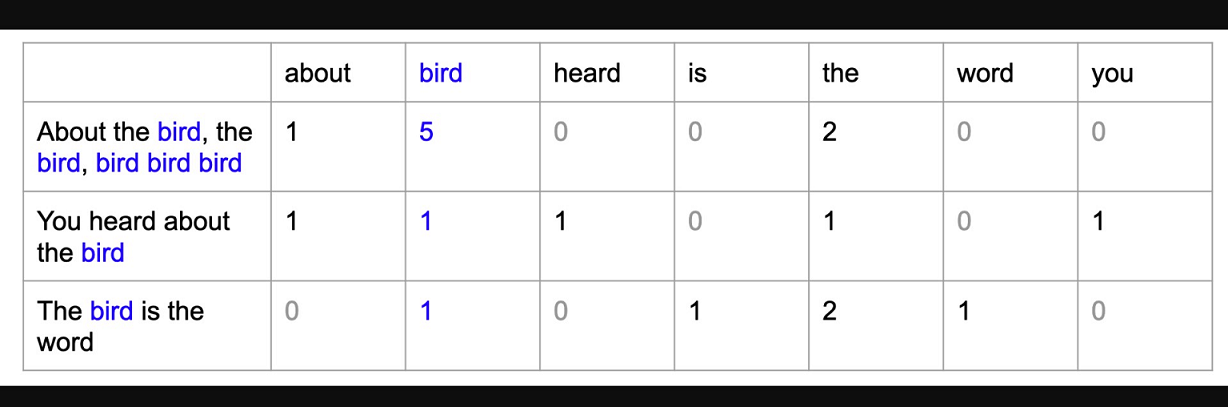

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

sentences = [
    "I love NLP",
    "NLP is amazing",
    "I love coding"
]

vectorizer = CountVectorizer()
bow = vectorizer.fit_transform(sentences)

print("Vocabulary:", vectorizer.get_feature_names_out())
print("Bag of Words matrix:")
print(bow.toarray())
# Output:
# Vocabulary: ['amazing' 'coding' 'is' 'love' 'nlp']
# Bag of Words matrix:
# [[0 0 0 1 1]
#  [1 0 1 0 1]
#  [0 1 0 1 0]]

Vocabulary: ['amazing' 'coding' 'is' 'love' 'nlp']
Bag of Words matrix:
[[0 0 0 1 1]
 [1 0 1 0 1]
 [0 1 0 1 0]]


# 9. TF-IDF (Term Frequency-Inverse Document Frequency)
Definition: Measures how important a word is to a document

**TF** (Term Frequency): How often word appears in document

**IDF** (Inverse Document Frequency): How unique word is across all documents

Why we do it: Common words get lower weight, unique words get higher weight

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

sentences = [
    "I love NLP",
    "NLP is amazing",
    "I love coding"
]

vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(sentences)

print("TF-IDF matrix:")
print(tfidf.toarray())

TF-IDF matrix:
[[0.         0.         0.         0.70710678 0.70710678]
 [0.62276601 0.         0.62276601 0.         0.4736296 ]
 [0.         0.79596054 0.         0.60534851 0.        ]]


# 10. Text Classification
Definition: Teaching computer to categorize text (like spam/not spam)

 Why we do it: Automatically organize and understand text

In [14]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

texts = ["free money", "hello friend", "win lottery", "meeting tomorrow"]
labels = ["spam", "not spam", "spam", "not spam"]

# Convert text to numerical features using CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(texts)

# Train the classifier
classifier = MultinomialNB()
classifier.fit(X_train, labels)

MultinomialNB()

In [15]:
# Predict
new_text = ["hello friend"]
# Convert new text to numerical features using the *same* vectorizer
X_new = vectorizer.transform(new_text)
prediction = classifier.predict(X_new)  # Now it will predict "spam"

print(f"New text: {new_text}")
print(f"Prediction: {prediction[0]}")

New text: ['hello friend']
Prediction: not spam


# 11. Sentiment Analysis
Definition: Finding if text is positive, negative, or neutral

Why we do it: Understand opinions in reviews, tweets, etc.

In [16]:
# Simple rule-based example
positive_words = ["good", "great", "awesome", "happy"]
negative_words = ["bad", "terrible", "awful", "sad"]

def check_sentiment(text):
    text = text.lower()
    pos_count = sum(1 for word in positive_words if word in text)
    neg_count = sum(1 for word in negative_words if word in text)

    if pos_count > neg_count:
        return "Positive"
    elif neg_count > pos_count:
        return "Negative"
    else:
        return "Neutral"

print(check_sentiment("This movie is good!"))    # Output: Positive
print(check_sentiment("This movie is bad!"))     # Output: Negative
print(check_sentiment("This movie is okay."))    # Output: Neutral

Positive
Negative
Neutral


# 12. Part-of-Speech (POS) Tagging
Definition: Labeling words as noun, verb, adjective, etc.

Why we do it: Understand grammar structure

In [17]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')

# Output: [('I', 'PRP'), ('love', 'VBP'), ('learning', 'VBG'), ('NLP', 'NN')]
# PRP = Pronoun, VBP = Verb, VBG = Verb (gerund), NN = Noun

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [18]:

text = "I love learning NLP"
tokens = word_tokenize(text)
pos_tags = nltk.pos_tag(tokens)

print(pos_tags)

[('I', 'PRP'), ('love', 'VBP'), ('learning', 'VBG'), ('NLP', 'NNP')]


# 13. Named Entity Recognition (NER)
Definition: Finding names of people, places, organizations in text

Why we do it: Extract important information

In [20]:
import nltk
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [21]:
text = "Apple is opening a new store in New York next month."
tokens = word_tokenize(text)
pos_tags = nltk.pos_tag(tokens)
ner_tags = nltk.ne_chunk(pos_tags)

print(ner_tags)
# Shows: (GPE New/York) → GPE means Geo-Political Entity (location)

(S
  (GPE Apple/NNP)
  is/VBZ
  opening/VBG
  a/DT
  new/JJ
  store/NN
  in/IN
  (GPE New/NNP York/NNP)
  next/JJ
  month/NN
  ./.)
